In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [187]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [188]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [189]:
df.shape

(10000, 14)

In [190]:
df.duplicated().sum()

0

In [191]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [192]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [193]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [194]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [195]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [196]:
#one hot
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [197]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [198]:
# train test split
X = df.drop(columns = ['Exited'])
Y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [199]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X.shape

((8000, 11), (2000, 11), (8000,), (2000,), (10000, 11))

In [200]:
#scale it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [201]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [202]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [203]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [204]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 11)                132       
                                                                 
 dense_22 (Dense)            (None, 11)                132       
                                                                 
 dense_23 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [205]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics = 'accuracy')

In [206]:
history = model.fit(X_train_scaled,y_train,epochs = 1000,validation_split = 0.2)

Epoch 1/1000
200/200 [==============================] - 2s 4ms/step - loss: 0.5421 - accuracy: 0.7733 - val_loss: 0.4991 - val_accuracy: 0.7975
Epoch 2/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4773 - accuracy: 0.7972 - val_loss: 0.4651 - val_accuracy: 0.7969
Epoch 3/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4496 - accuracy: 0.7989 - val_loss: 0.4437 - val_accuracy: 0.8012
Epoch 4/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4347 - accuracy: 0.8062 - val_loss: 0.4324 - val_accuracy: 0.8050
Epoch 5/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8127 - val_loss: 0.4252 - val_accuracy: 0.8087
Epoch 6/1000
200/200 [==============================] - 1s 4ms/step - loss: 0.4203 - accuracy: 0.8170 - val_loss: 0.4195 - val_accuracy: 0.8100
Epoch 7/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8227 - val_loss: 0.4131 - val_accuracy:

In [207]:
model.layers[0].get_weights()

[array([[ 1.2651061 ,  0.18801752,  0.08281315,  1.024024  ,  0.06872353,
          0.16764157, -0.1483637 ,  0.11279324, -0.36823097, -0.05085811,
          0.5137181 ],
        [ 0.7813175 , -0.02131611, -0.30767062, -0.6854727 ,  1.8699887 ,
          1.057231  , -0.21522029,  0.628427  ,  0.59243697,  0.41993523,
          0.12615485],
        [ 0.47168592,  0.0937282 ,  0.10779981, -0.21892661,  0.07499266,
         -0.20562768, -0.27636117, -0.19370075, -0.25557926,  0.10363471,
          0.08111421],
        [-1.4050393 ,  1.4307219 ,  0.6024296 , -0.7000685 , -0.5524283 ,
          1.1306872 , -0.22522737, -0.28067818, -0.35816723,  0.56767076,
         -0.7764068 ],
        [ 1.2145997 , -0.5000841 , -1.542116  ,  0.39250672, -0.4830142 ,
          0.68483263, -0.40618846, -1.0168475 , -1.1810381 ,  1.2848773 ,
          0.6302723 ],
        [ 0.3314102 ,  0.09554427, -0.2526005 ,  0.510616  , -0.16445258,
          0.13197155, -0.8838993 ,  0.89500237, -0.15396768, -0.1630110

In [208]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [210]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [211]:
history.history


{'loss': [0.5421497225761414,
  0.4772542715072632,
  0.4495627284049988,
  0.434672087430954,
  0.42663684487342834,
  0.42032310366630554,
  0.41316771507263184,
  0.40577587485313416,
  0.3982723653316498,
  0.3903683125972748,
  0.38110607862472534,
  0.3717719614505768,
  0.3648049235343933,
  0.35847923159599304,
  0.3548766076564789,
  0.3517235815525055,
  0.34935176372528076,
  0.34757980704307556,
  0.3466101586818695,
  0.3458392322063446,
  0.3446531295776367,
  0.3433339595794678,
  0.3427236080169678,
  0.3418900966644287,
  0.34083956480026245,
  0.34042370319366455,
  0.3392384350299835,
  0.33845657110214233,
  0.33785760402679443,
  0.33727744221687317,
  0.33709394931793213,
  0.33658382296562195,
  0.336384654045105,
  0.33551308512687683,
  0.3354741036891937,
  0.33445996046066284,
  0.33448168635368347,
  0.3345748484134674,
  0.33362385630607605,
  0.3333880603313446,
  0.33311760425567627,
  0.3328646719455719,
  0.33238041400909424,
  0.3321009874343872,
  0.3

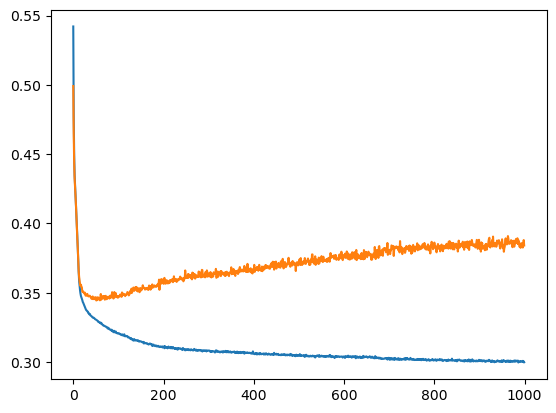

In [212]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [213]:
import matplotlib.pyplot as plt
history

In [214]:
history.history

{'loss': [0.5421497225761414,
  0.4772542715072632,
  0.4495627284049988,
  0.434672087430954,
  0.42663684487342834,
  0.42032310366630554,
  0.41316771507263184,
  0.40577587485313416,
  0.3982723653316498,
  0.3903683125972748,
  0.38110607862472534,
  0.3717719614505768,
  0.3648049235343933,
  0.35847923159599304,
  0.3548766076564789,
  0.3517235815525055,
  0.34935176372528076,
  0.34757980704307556,
  0.3466101586818695,
  0.3458392322063446,
  0.3446531295776367,
  0.3433339595794678,
  0.3427236080169678,
  0.3418900966644287,
  0.34083956480026245,
  0.34042370319366455,
  0.3392384350299835,
  0.33845657110214233,
  0.33785760402679443,
  0.33727744221687317,
  0.33709394931793213,
  0.33658382296562195,
  0.336384654045105,
  0.33551308512687683,
  0.3354741036891937,
  0.33445996046066284,
  0.33448168635368347,
  0.3345748484134674,
  0.33362385630607605,
  0.3333880603313446,
  0.33311760425567627,
  0.3328646719455719,
  0.33238041400909424,
  0.3321009874343872,
  0.3

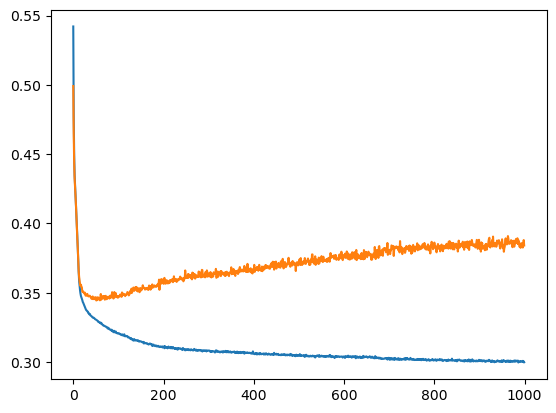

In [215]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

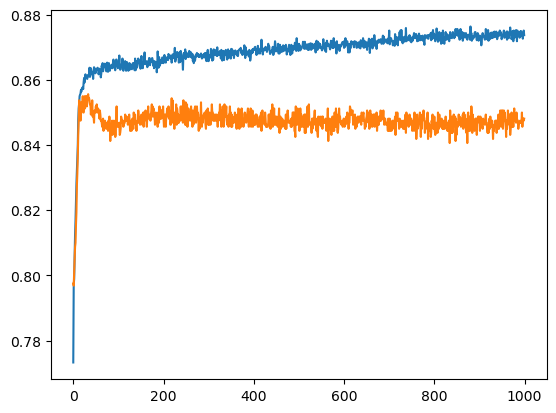

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])